# References:

### Datasets used here

ExPUNations Dataset
https://github.com/amazon-science/expunations



ExPUNations: Augmenting Puns with Keywords and Explanations
https://arxiv.org/pdf/2210.13513



SemEval-2017 Task 7: Detection and Interpretation of English Puns
https://aclanthology.org/S17-2005.pdf
https://tudatalib.ulb.tu-darmstadt.de/handle/tudatalib/2445


Is GPT-4 Good Enough to Evaluate Jokes?
https://computationalcreativity.net/iccc23/papers/ICCC-2023_paper_89.pdf



### Other things:
Humor appreciation can be predicted with machine learning techniques
https://www.nature.com/articles/s41598-023-45935-1

 The Complexity of Jokes Is Limited by Cognitive Constraints on Mentalizing 
https://pubmed.ncbi.nlm.nih.gov/26597196/

## Read the Json expunations annotations

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from huggingface_hub import login
from sklearn.decomposition import PCA
import math 
from IPython.display import Markdown, display
import pandas as pd
def printmd(string):
    display(Markdown(string))
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from itertools import chain
from sentence_transformers import SentenceTransformer, util
import openai

In [2]:
import pandas as pd
import json

def json_to_table(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        
        # Convert JSON data to a DataFrame
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error: {e}")

file_path = "expunations_annotated_full.json"  
expunations = json_to_table(file_path)
print (expunations)


            ID Understand the text? Offensive/Inappropriate?       Is a Joke?  \
0      hom_362      [1, 1, 1, 1, 0]           [0, 1, 0, 0, ]  [1, 0, 1, 0, 0]   
1      het_837      [1, 1, 1, 1, 1]          [0, 0, 0, 0, 0]  [1, 1, 1, 1, 1]   
2      het_635      [1, 1, 1, 1, 1]          [0, 0, 0, 0, 0]  [1, 1, 1, 1, 1]   
3      hom_657      [1, 0, 1, 1, 0]            [0, , 0, 0, ]  [1, 0, 0, 1, 0]   
4     het_1275      [0, 1, 1, 1, 1]          [0, 0, 0, 0, 0]  [0, 1, 1, 1, 1]   
...        ...                  ...                      ...              ...   
1894  hom_2076      [1, 1, 1, 1, 0]           [0, 0, 0, 0, ]  [0, 1, 1, 0, 0]   
1895  hom_1437      [1, 1, 1, 0, 1]           [0, 0, 0, , 0]  [1, 1, 1, 0, 1]   
1896  het_1530      [1, 1, 1, 0, 1]           [0, 0, 0, , 0]  [1, 1, 1, 0, 1]   
1897   het_100      [1, 1, 1, 1, 1]          [0, 0, 0, 0, 0]  [1, 1, 1, 1, 1]   
1898   hom_364      [1, 1, 1, 0, 1]           [0, 0, 0, , 0]  [1, 1, 1, 0, 1]   

      Funniness (1-5)      

In [3]:
expunations

,ID,Understand the text?,Offensive/Inappropriate?,Is a Joke?,Funniness (1-5),Natural language explanation,Joke keywords,Annotator_IDs
0,hom_362,"[1, 1, 1, 1, 0]","[0, 1, 0, 0, ]","[1, 0, 1, 0, 0]","[2, 0, 1, 0, 0]",[Talking about being true as in being real or ...,"[[true, teeth, false], [], [be true, teeth, fa...","[0, 1, 2, 3, 4]"
1,het_837,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 4, 2, 1, 2]","[absinthe sounds like absent , This is a play ...","[[drinking, leave of absinthe], [Drinking too ...","[0, 1, 2, 3, 4]"
2,het_635,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 3, 1, 2, 2]","[root sounds like route , This is a play on wo...","[[animals, soil, escape root], [Animals, tunne...","[0, 1, 2, 3, 4]"
3,hom_657,"[1, 0, 1, 1, 0]","[0, , 0, 0, ]","[1, 0, 0, 1, 0]","[2, 0, 0, 1, 0]",[the phrase dish it out means to criticizie an...,"[[waitress's, dish it out], [], [], [waitress,...","[0, 1, 2, 3, 4]"
4,het_1275,"[0, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[0, 1, 1, 1, 1]","[0, 2, 1, 1, 2]","[, This is a play on words. Sense of humor mea...","[[], [gossip, sense of rumor], [gossip, sense ...","[0, 1, 2, 3, 4]"
...,...,...,...,...,...,...,...,...
1894,hom_2076,"[1, 1, 1, 1, 0]","[0, 0, 0, 0, ]","[0, 1, 1, 0, 0]","[0, 1, 1, 0, 0]","[, This is a pun on the phrase 'stroke of geni...","[[], [Da Vinci, stroke, genius], [Leonardo Da ...","[7, 5, 6, 2, 8]"
1895,hom_1437,"[1, 1, 1, 0, 1]","[0, 0, 0, , 0]","[1, 1, 1, 0, 1]","[1, 1, 2, 0, 1]",[driven can mean to drive a car or it can me f...,"[[cars, driven], [cars, driven, eden], [earlie...","[7, 5, 6, 2, 8]"
1896,het_1530,"[1, 1, 1, 0, 1]","[0, 0, 0, , 0]","[1, 1, 1, 0, 1]","[1, 1, 1, 0, 1]","[son sounds like sun , This is a pun on 'sun w...","[[doting, son], [parents, son, worshipers], [d...","[7, 5, 6, 2, 8]"
1897,het_100,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[1, 1, 3, 1, 2]","[lion sounds like line , This is a pun on the ...","[[zoo, lion], [phone, zoo, lion], [phoned, zoo...","[7, 5, 6, 2, 8]"


In [4]:
expunations_onlyfun = expunations[expunations['Is a Joke?'].apply(lambda x: all(i == 1 for i in x))]

In [5]:
expunations_onlyfun

,ID,Understand the text?,Offensive/Inappropriate?,Is a Joke?,Funniness (1-5),Natural language explanation,Joke keywords,Annotator_IDs
1,het_837,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 4, 2, 1, 2]","[absinthe sounds like absent , This is a play ...","[[drinking, leave of absinthe], [Drinking too ...","[0, 1, 2, 3, 4]"
2,het_635,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 3, 1, 2, 2]","[root sounds like route , This is a play on wo...","[[animals, soil, escape root], [Animals, tunne...","[0, 1, 2, 3, 4]"
9,hom_1066,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 2, 2, 1, 2]",[clay when it dries out is easy to break and ...,"[[news, clay, breaking], [news, clay tablets, ...","[0, 1, 2, 3, 4]"
19,hom_958,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[4, 3, 2, 1, 2]",[bakery make bread and when you heat up a slic...,"[[bakery, burned, toast], [bakery burned down,...","[0, 1, 2, 3, 4]"
23,hom_2014,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 1, 2, 1, 2]",[sponge normally soaks in water in this case i...,"[[sponge, soaked it in], [live sponge on displ...","[0, 1, 2, 3, 4]"
...,...,...,...,...,...,...,...,...
1868,het_1730,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 1, 3, 2, 3]","[aweigh sounds like away , This is a pun on 'a...","[[sailed, aweigh], [sailed, anchor, aweigh], [...","[7, 5, 6, 2, 8]"
1872,het_708,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 2, 1, 2, 2]","[byte sounds like bite , This is a pun on 'bit...","[[dog, byte], [dog, computer, byte], [dog, com...","[7, 5, 6, 2, 8]"
1876,het_1396,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[1, 1, 1, 2, 1]","[coroner sounds like corner , This is a pun on...","[[dying artist, coroner], [artist, painted, co...","[7, 5, 6, 2, 8]"
1885,het_358,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 1, 2, 1, 2]","[platter sounds like matter , This is a pun on...","[[diet, platter], [diet, mind, platter], [succ...","[7, 5, 6, 2, 8]"


In [6]:
expunations_nofun = expunations[expunations['Is a Joke?'].apply(lambda x: all(i == 0 for i in x))]

In [7]:
expunations_nofun

,ID,Understand the text?,Offensive/Inappropriate?,Is a Joke?,Funniness (1-5),Natural language explanation,Joke keywords,Annotator_IDs
12,hom_1230,"[0, 1, 1, 0, 0]","[, 0, 0, , ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]"
32,het_1003,"[0, 0, 0, 1, 0]","[, , , 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]"
39,hom_533,"[0, 1, 1, 1, 1]","[, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]"
43,hom_1359,"[0, 0, 0, 1, 0]","[, , , 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]"
49,het_479,"[0, 0, 0, 1, 0]","[, , , 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]"
...,...,...,...,...,...,...,...,...
1839,het_1563,"[0, 1, 1, 0, 0]","[, 0, 0, , ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[10, 3, 4, 0, 1]"
1870,het_238,"[1, 1, 0, 1, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[7, 5, 6, 2, 8]"
1883,hom_82,"[1, 0, 0, 1, 0]","[0, , 0, 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[7, 5, 6, 2, 8]"
1887,het_566,"[1, 0, 0, 0, 0]","[0, , 0, , ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[7, 5, 6, 2, 8]"


In [15]:
expunations_base_01 = pd.read_csv('distances_single_tokens_colbert_12feb.csv', encoding='utf-8')
expunations_base_02 = pd.read_csv('jokes_base.csv', encoding='utf-8')
expunations = pd.merge(expunations_base_01, expunations_base_02, on='joke')


In [17]:
expunations_onlyfun_with_codes = pd.merge(expunations_onlyfun, expunations, on='ID')
expunations_nofun_with_codes = pd.merge(expunations_nofun, expunations, on='ID')

In [18]:
expunations_onlyfun_with_codes

,ID,Understand the text?,Offensive/Inappropriate?,Is a Joke?,Funniness (1-5),Natural language explanation,Joke keywords,Annotator_IDs,joke,expression1,...,euclidean_distance,cosine_similarity,explanation,keywords,funniness_average_y,filtered_funniness_average_y,sentence_1,word_1,sentence_2,word_2
0,hom_1066,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 2, 2, 1, 2]",[clay when it dries out is easy to break and ...,"[[news, clay, breaking], [news, clay tablets, ...","[0, 1, 2, 3, 4]",Back when the news was written on clay tablets...,breaking,...,17.696709,0.269818,['clay when it dries out is easy to break and...,"[['news', 'clay', 'breaking'], ['news', 'clay ...",1.8,1.8,NaN,NaN,NaN,NaN
1,hom_958,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[4, 3, 2, 1, 2]",[bakery make bread and when you heat up a slic...,"[[bakery, burned, toast], [bakery burned down,...","[0, 1, 2, 3, 4]",My friend ' s bakery burned down last night . ...,toast,...,15.263659,0.499644,['bakery make bread and when you heat up a sli...,"[['bakery', 'burned', 'toast'], ['bakery burne...",2.4,2.4,NaN,NaN,NaN,NaN
2,het_987,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[1, 4, 1, 1, 2]",[cloves are ususally found in salad dressing b...,"[[salad dressing, cloves], [lettuce, bare, put...","[0, 1, 2, 3, 4]",Even covered in salad dressing my lettuce look...,clothes,...,14.226140,0.443392,['cloves are ususally found in salad dressing ...,"[['salad dressing', 'cloves'], ['lettuce', 'ba...",1.8,1.8,NaN,NaN,NaN,NaN
3,het_773,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 2, 1, 1, 2]","[25 is a number that used as a quarter , This ...","[[25 cent, quarterly], [mint, 25 cent pieces, ...","[0, 1, 2, 3, 4]",If the mint makes 25 cent pieces it should exp...,quarter,...,16.977402,0.315197,"['25 is a number that used as a quarter ', 'Th...","[['25 cent', 'quarterly'], ['mint', '25 cent p...",1.8,1.8,NaN,NaN,NaN,NaN
4,hom_614,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[3, 3, 1, 1, 2]",[steep means the angle and hills usually have ...,"[[hill, steep], [property with a hill, a littl...","[0, 1, 2, 3, 4]",I went to buy some property with a hill on it ...,steep,...,15.402664,0.467893,['steep means the angle and hills usually have...,"[['hill', 'steep'], ['property with a hill', '...",2.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,hom_619,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 2, 2, 1, 2]",[drive can mean driving the ball in golf or it...,"[[racer, golfer, drive], [racer, golfer, drive...","[7, 5, 6, 2, 0]",A racer who was also a golfer really knew how ...,drive,...,17.353780,0.451691,['drive can mean driving the ball in golf or i...,"[['racer', 'golfer', 'drive'], ['racer', 'golf...",1.8,1.8,NaN,NaN,NaN,NaN
460,hom_1072,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 1, 3, 1, 3]",[hardened means tought but it can refer to the...,"[[thief, cement, hardened criminal], [theif, c...","[7, 5, 6, 2, 0]",When the thief fell in the wet cement and brok...,hardened,...,16.011408,0.385288,['hardened means tought but it can refer to th...,"[['thief', 'cement', 'hardened criminal'], ['t...",2.0,2.0,NaN,NaN,NaN,NaN
461,hom_1383,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 1, 2, 1, 3]","[rattled sounds like rattlesnake , This is a p...","[[snake, rattled], [snake, struck, rattled], [...","[7, 5, 6, 2, 0]",After that poisonous snake struck at me in the...,rattled,...,7.384486,0.897637,"['rattled sounds like rattlesnake ', ""This is ...","[['snake', 'rattled'], ['snake', 'struck', 'ra...",1.8,1.8,NaN,NaN,NaN,NaN
462,hom_1196,"[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[2, 2, 3, 2, 3]","[bonding sounds like bond , This is a pun on '...","[[007, bonding], [family, 007, bonding], [fami...","[7, 5, 6, 2, 0]",A family went to watch a 007 movie at the thea...,bonding,...,12.706721,0.649790,"['bonding sounds like bond ', ""This is a 

In [19]:
expunations_nofun_with_codes

,ID,Understand the text?,Offensive/Inappropriate?,Is a Joke?,Funniness (1-5),Natural language explanation,Joke keywords,Annotator_IDs,joke,expression1,...,euclidean_distance,cosine_similarity,explanation,keywords,funniness_average_y,filtered_funniness_average_y,sentence_1,word_1,sentence_2,word_2
0,hom_1230,"[0, 1, 1, 0, 0]","[, 0, 0, , ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]",None but the brave deserve the fair .,fair,...,15.660479,0.453439,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
1,het_1003,"[0, 0, 0, 1, 0]","[, , , 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]",Environmentalist : expert in computer operatin...,environment,...,15.496712,0.508585,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
2,hom_533,"[0, 1, 1, 1, 1]","[, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]",Don ' t kill the goose that lays the golden eg...,goose,...,15.687516,0.492417,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
3,hom_1359,"[0, 0, 0, 1, 0]","[, , , 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]","Occasionally , I hear an assertion followed by...",serve,...,16.388567,0.356570,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
4,het_479,"[0, 0, 0, 1, 0]","[, , , 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[0, 1, 2, 3, 4]","' ' I ' ve an urgent appointment , ' ' said To...",urgent appointment,...,12.714213,0.605773,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,het_1360,"[0, 1, 0, 0, 0]","[, 0, 0, , ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[7, 5, 6, 9, 1]",Sin and bear it,bear,...,16.194921,0.449336,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
109,het_738,"[1, 1, 0, 1, 0]","[0, 0, 0, 0, ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[7, 5, 6, 2, 0]",Life is ten percent what happens to you and ni...,respond,...,15.672090,0.374496,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
110,het_1341,"[1, 0, 0, 0, 0]","[0, , 0, , ]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[7, 5, 6, 2, 0]",It ' s a cracked pitcher that goes longest to ...,pitcher,...,15.624717,0.407655,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN
111,hom_716,"[1, 1, 0, 1, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[, , , , ]","[[], [], [], [], []]","[7, 5, 6, 2, 0]","Christians , keep the faith . . . but not from...",keep,...,11.955064,0.632835,"['', '', '', '', '']","[[''], [''], [''], [''], ['']]",0.0,0.0,NaN,NaN,NaN,NaN


### Plot fun and nofun against score - euclidean distance

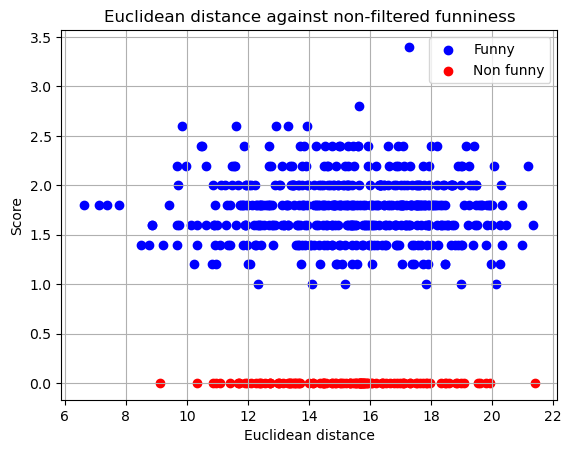

In [31]:
plt.scatter(expunations_onlyfun_with_codes['euclidean_distance'], expunations_onlyfun_with_codes['funniness_average_y'], label="Funny", marker="o", color="b")
plt.scatter(expunations_nofun_with_codes['euclidean_distance'], expunations_nofun_with_codes['funniness_average_y'], label="Non funny", marker="o", color="r")

plt.xlabel("Euclidean distance")
plt.ylabel("Score")
plt.title("Euclidean distance against non-filtered funniness")
plt.legend()
plt.grid()

# Show plot
plt.show()


### Plot fun and nofun against score - cosine similarity

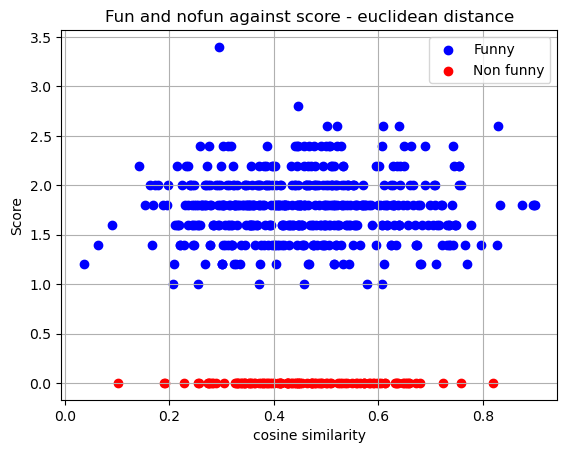

In [34]:
plt.scatter(expunations_onlyfun_with_codes['cosine_similarity'], expunations_onlyfun_with_codes['funniness_average_y'], label="Funny", marker="o", color="b")
plt.scatter(expunations_nofun_with_codes['cosine_similarity'], expunations_nofun_with_codes['funniness_average_y'], label="Non funny", marker="o", color="r")

plt.xlabel("cosine similarity")
plt.ylabel("Score")
plt.title("Fun and nofun against score - euclidean distance")
plt.legend()
plt.grid()

# Show plot
plt.show()


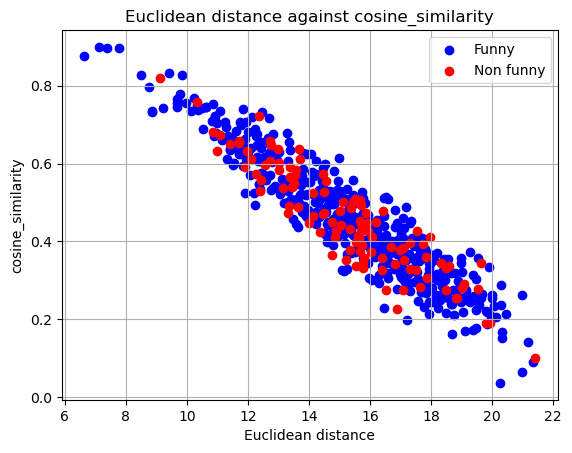

In [35]:
plt.scatter(expunations_onlyfun_with_codes['euclidean_distance'], expunations_onlyfun_with_codes['cosine_similarity'], label="Funny", marker="o", color="b")
plt.scatter(expunations_nofun_with_codes['euclidean_distance'], expunations_nofun_with_codes['cosine_similarity'], label="Non funny", marker="o", color="r")

plt.xlabel("Euclidean distance")
plt.ylabel("cosine_similarity")
plt.title("Euclidean distance against cosine_similarity")
plt.legend()
plt.grid()

# Show plot
plt.show()
